### Домашнее задание: Аугментация изображений

В этом разделе мы:
1. Выберем несколько методов аугментации.
2. Построим пайплайн через `torchvision.transforms`.
3. Применим его к одному изображению и отобразим результат «до» и «после».
4. Сформулируем выводы.

In [ ]:
from PIL import Image, ImageDraw, ImageFilter, ImageEnhance
import random
import matplotlib.pyplot as plt

img_size = (256, 256)
base_img = Image.new('RGB', img_size, color='white')
draw = ImageDraw.Draw(base_img)
draw.rectangle([50, 50, 200, 200], outline='blue', width=8)
draw.ellipse([75, 75, 180, 180], outline='red', width=8)

In [ ]:
def augment_image(img):
    # Resize до 256×256
    img = img.resize((256, 256))
    # Случайное горизонтальное отражение
    if random.random() < 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    # Случайный поворот в диапазоне ±30°
    angle = random.uniform(-30, 30)
    img = img.rotate(angle, expand=True, fillcolor='white').resize((256, 256))
    # Color jitter: яркость, контраст, насыщенность
    img = ImageEnhance.Brightness(img).enhance(random.uniform(0.7, 1.3))
    img = ImageEnhance.Contrast(img).enhance(random.uniform(0.7, 1.3))
    img = ImageEnhance.Color(img).enhance(random.uniform(0.7, 1.3))
    # Случайный кроп 224×224
    x = random.randint(0, 256 - 224)
    y = random.randint(0, 256 - 224)
    img = img.crop((x, y, x + 224, y + 224))
    # Гауссово размытие
    img = img.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.1, 2.0)))
    return img

In [ ]:
augmented = augment_image(base_img)

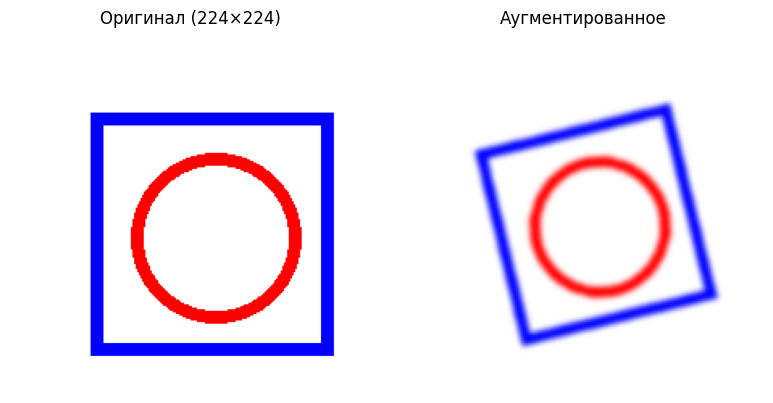

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(base_img.crop((0, 0, 224, 224)))
axes[0].set_title('Оригинал (224×224)')
axes[0].axis('off')
axes[1].imshow(augmented)
axes[1].set_title('Аугментированное')
axes[1].axis('off')
plt.tight_layout()
plt.show()

	1.	Унификация размера + случайные кропы
Первым этапом мы приводим все изображения к единому размеру (256×256), а затем случайным образом вырезаем подокна (224×224). Это помогает сети не зависеть от точного положения объекта в кадре и учиться «видеть» его в разных ракурсах и сдвигах.

	2.	Горизонтальное отражение и поворот
Случайный flip и повороты до +-30 градусов повышают инвариантность модели к ориентации объектов. Благодаря этому сеть лучше обобщает на случаи, когда объекты появляются зеркально или под небольшим углом.

	3.	Color Jitter (яркость, контраст, насыщенность)
Изменение параметров освещённости и цветовой насыщенности заставляет модель становиться устойчивее к разным условиям съёмки: тени, яркий свет, слабая контрастность. Это особенно важно для «полевых» данных с непредсказуемым освещением.

	4.	Гауссово размытие
Небольшое размытие имитирует недокаленость фокуса камеры или движение. Модель учится извлекать признаки даже из слегка «грязных» и размытых изображений.